Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.0066 - loss: 0.3533 - val_accuracy: 0.0094 - val_loss: 0.1957
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.0082 - loss: 0.1857 - val_accuracy: 0.0100 - val_loss: 0.1612
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.0097 - loss: 0.1576 - val_accuracy: 0.0125 - val_loss: 0.1451
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.0116 - loss: 0.1438 - val_accuracy: 0.0140 - val_loss: 0.1372
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.0137 - loss: 0.1368 - val_accuracy: 0.0124 - val_loss: 0.1328
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.0125 - loss: 0.1316 - val_accuracy: 0.0133 - val_loss: 0.1283
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.0125 - loss: 0.1282 - val_accuracy: 0.0129 - val_loss: 0.1254
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.0131 - loss: 0.1256 - val_accu

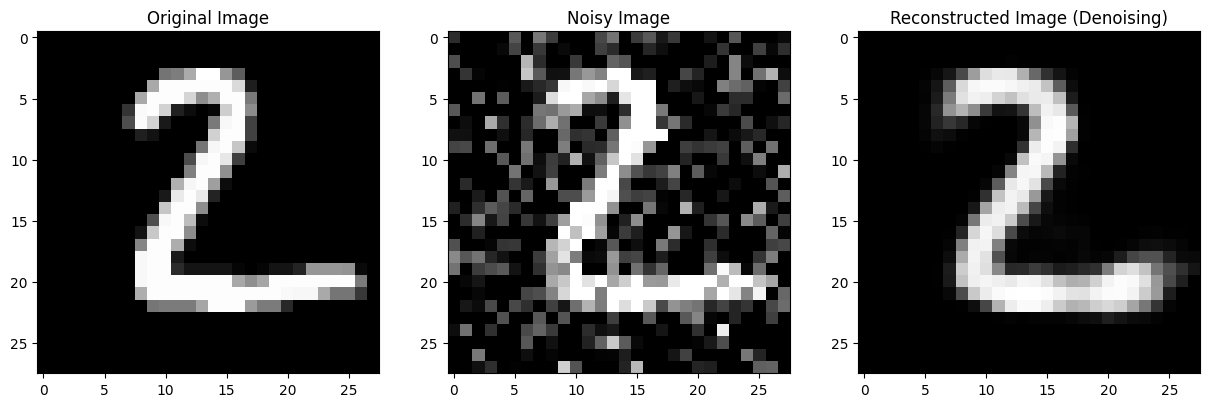

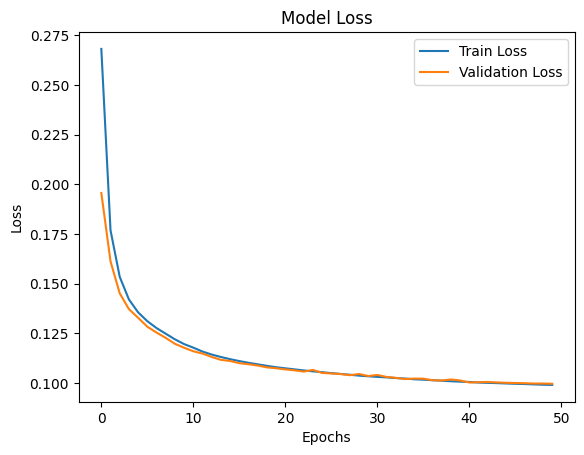

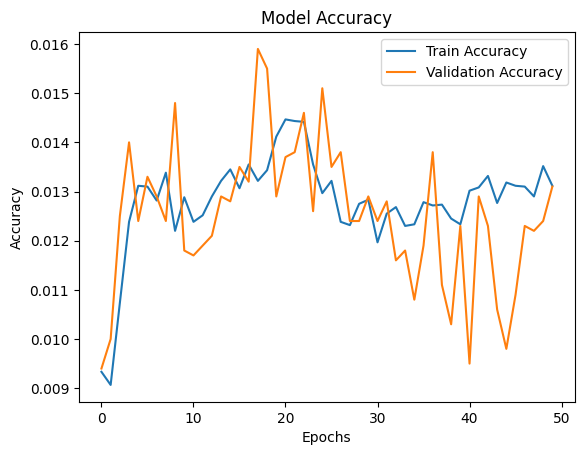

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

# 1. Load data
(x_train, _), (x_test, _) = mnist.load_data()

# 2. Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# 3. Add noise to the data
def add_noise(data, noise_factor=0.3):
    noise = np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = data + noise_factor * noise
    noisy_data = np.clip(noisy_data, 0., 1.)
    return noisy_data

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# 4. Build the Autoencoder model (with an extra hidden layer)
input_img = Input(shape=(784,))

# Encoder with additional hidden layer
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)  # Additional hidden layer
encoded = Dense(32, activation='relu')(encoded)  # Bottleneck layer

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Train the Autoencoder on noisy data
history = autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

# 6. Visualize reconstructed images
decoded_imgs_noisy = autoencoder.predict(x_test_noisy)

# Visualize an example before and after reconstruction
n = 1  # Index of the test image to visualize
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(x_test[n].reshape(28, 28), cmap='gray')
plt.title("Original Image")

# Noisy image
plt.subplot(1, 3, 2)
plt.imshow(x_test_noisy[n].reshape(28, 28), cmap='gray')
plt.title("Noisy Image")

# Reconstructed image
plt.subplot(1, 3, 3)
plt.imshow(decoded_imgs_noisy[n].reshape(28, 28), cmap='gray')
plt.title("Reconstructed Image (Denoising)")

plt.show()

# 7. Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# 8. Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()
